# 5.1 使用matplotlib可视化数据

## 5.1.1 matplotlib 可视化基础

In [2]:
import abupy
from abupy import ABuSymbolPd
abupy.env.enable_example_env_ipython()
tsla_df = ABuSymbolPd.make_kl_df('usTSLA', n_folds = 2)
tsla_df.tail()

enable example env will only read RomDataBu/csv


,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2016-07-20,228.36,229.800,225.00,1.38,226.47,225.26,2568498,20160720,2,499,9.1923,8.7234
2016-07-21,220.50,227.847,219.10,-3.44,226.00,228.36,4428651,20160721,3,500,9.1711,8.7251
2016-07-22,222.27,224.500,218.88,0.80,221.99,220.50,2579692,20160722,4,501,9.1858,8.7790
2016-07-25,230.01,231.390,221.37,3.48,222.27,222.27,4490683,20160725,0,502,9.2669,8.9298
2016-07-26,225.93,228.740,225.63,-1.77,227.34,230.01,41833,20160726,1,503,9.1337,8.7541


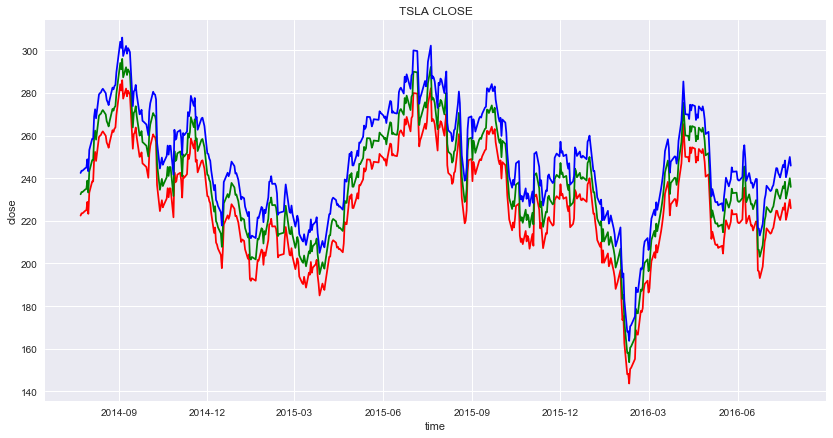

In [3]:
import matplotlib.pyplot as plt
def plot_demo(axs=None, just_series=False):
    # 如果传入子画布则使用子画布来绘制
    drawer = plt if axs is None else axs
    drawer.plot(tsla_df.close, c='r')
    if not just_series:
        # 为了使曲线不重叠,y变量增加了10个单位tals_df.close.valuses+10
        drawer.plot(tsla_df.close.index.to_pydatetime(), tsla_df.close.values + 10, c='g')
        # numpy.tolist()将numpy对象转换为list对象
        drawer.plot(tsla_df.close.index.to_pydatetime().tolist(), (tsla_df.close.values + 20).tolist(), c = 'b')
        
    plt.xlabel('time')
    plt.ylabel('close')
    plt.title('TSLA CLOSE')
    plt.grid(True)
#     plt.show()  这里的show不能放在这里,回导致后续绘制多个图的时候不能正常展示
    
plot_demo()
plt.show() 

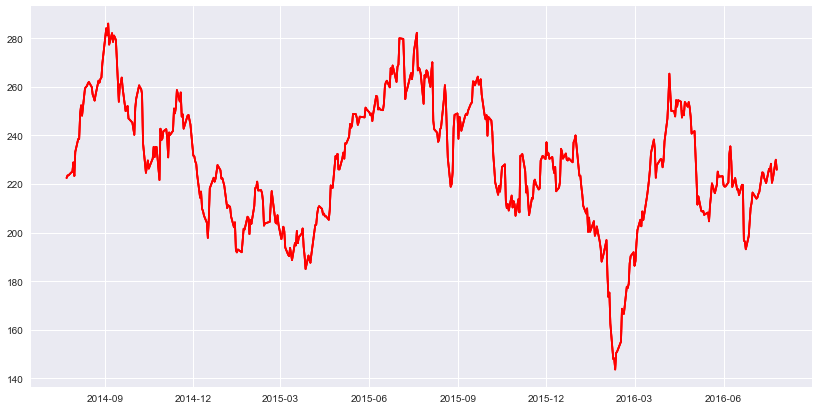

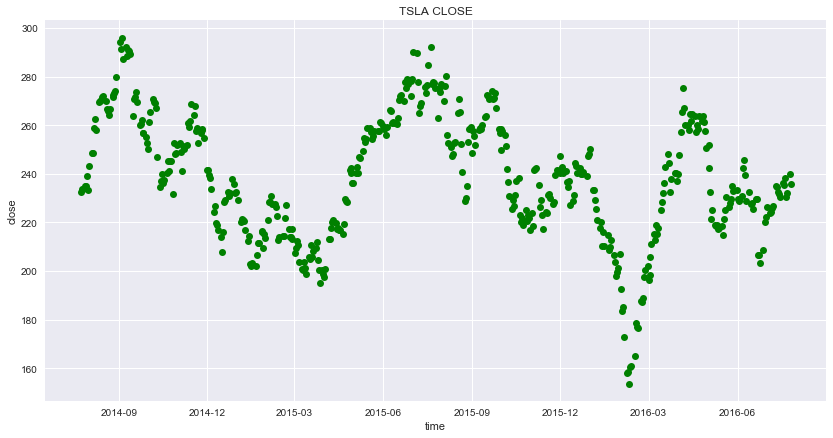

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot_date(tsla_df.close.index, tsla_df.close.values + 10, c='g')
plt.xlabel('time')
plt.ylabel('close')
plt.title('TSLA CLOSE')
plt.grid(True)
plt.show()

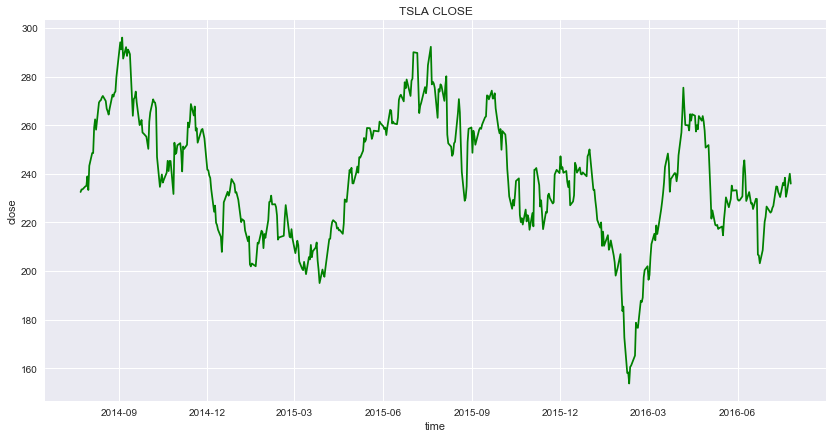

In [10]:
import matplotlib.pyplot as plt
plt.plot(tsla_df.close.index.to_pydatetime(),  tsla_df.close.values + 10, c='g')
plt.xlabel('time')
plt.ylabel('close')
plt.title('TSLA CLOSE')
plt.grid(True)
plt.show()

## 5.1.2 matplotlib 子画布及loc的使用

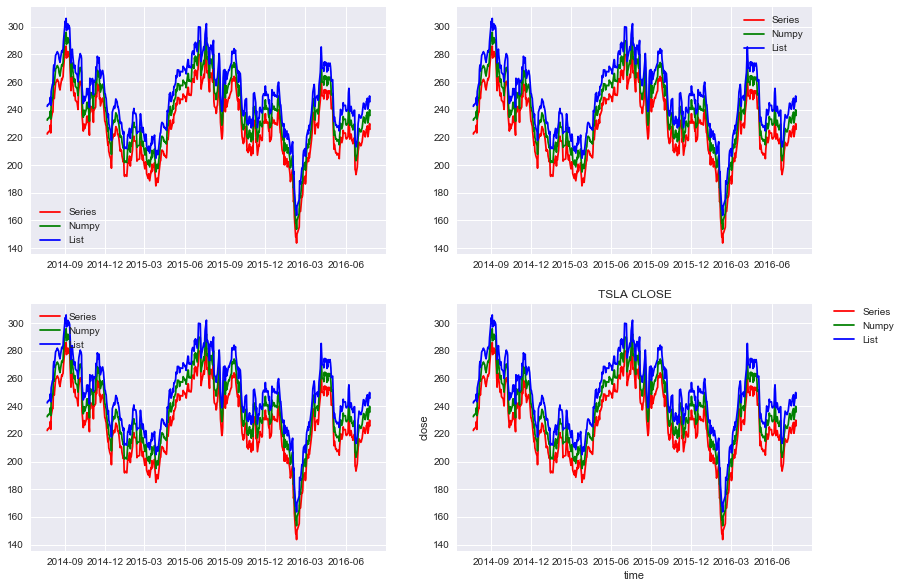

In [62]:
_, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
drawer = axs[0][0]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc = 0)


drawer = axs[0][1]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc = 1)


drawer = axs[1][0]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc = 2)

drawer = axs[1][1]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0 )
plt.show()

## 5.1.3 K线图的绘制

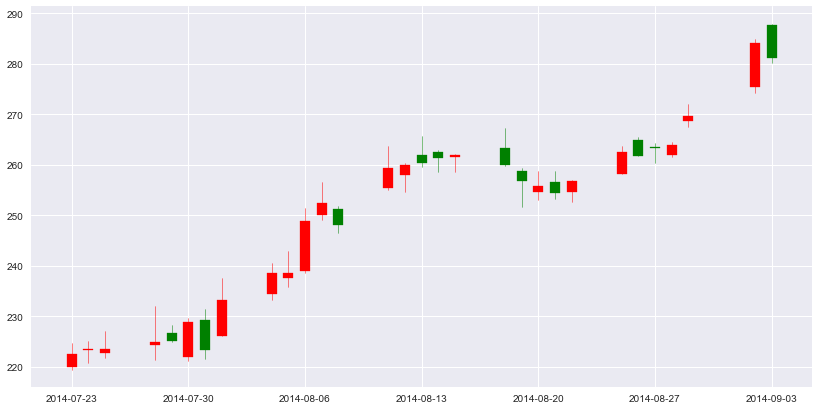

In [28]:
import matplotlib.finance as mpf
__colorup__ = "red"
__colordown__ = "green"
tsla_part_df = tsla_df[:30]
fig, ax = plt.subplots(figsize=(14,7))
qutotes = []
for index , (d,o,c,h,l) in enumerate(zip(tsla_part_df.index, tsla_part_df.open, tsla_part_df.close
                                         , tsla_part_df.high, tsla_part_df.low)):
    d = mpf.date2num(d)
    val = (d, o, c,h,l)
    qutotes.append(val)
mpf.candlestick_ochl(ax, qutotes, width=0.6, colorup =__colorup__, colordown=__colordown__)
ax.autoscale_view()
ax.xaxis_date()
plt.show() # 最新的使用需要添加show才能展示

# 5.2 使用bokeh交互可视化

In [26]:
from abupy import ABuMarketDrawing
ABuMarketDrawing.plot_candle_form_klpd(tsla_df, html_bk=True)

通过上面一行代码,就可以展示出来相应的图表

# 5.3 使用pandas可视化数据

## 5.3.1 绘制股票的收益以及收益波动情况 -- 没仔细看

## 5.3.2 绘制股票的价格与均线

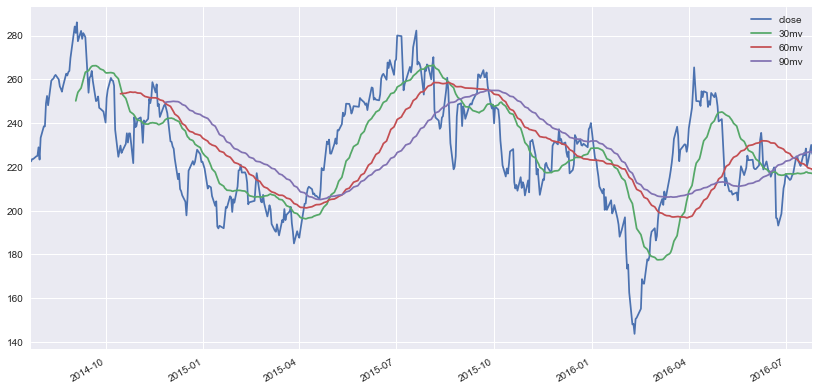

In [34]:
import pandas as pd
tsla_df.close.plot()
pd.rolling_mean(tsla_df.close, window=30).plot()
pd.rolling_mean(tsla_df.close, window=60).plot()
pd.rolling_mean(tsla_df.close, window=90).plot()
plt.legend(['close', '30mv', '60mv', '90mv'])
plt.show()

## 5.3.3 其他pandas统计图形种类--没仔细看

# 5.4 使用Seaborn可视化数据

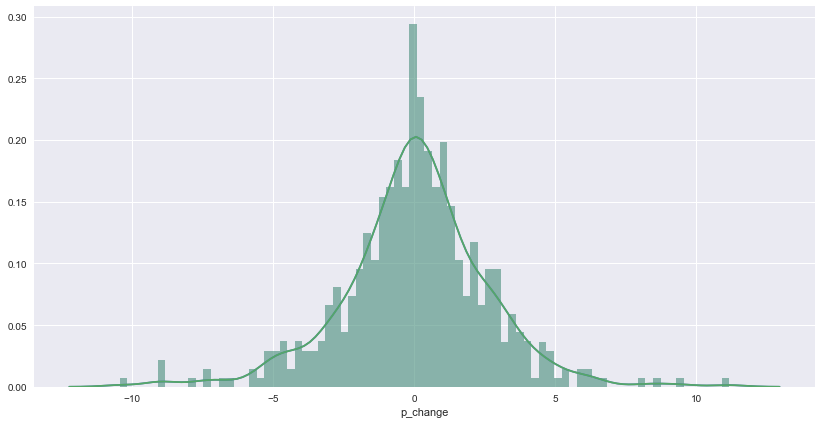

In [38]:
import seaborn as sns
sns.distplot(tsla_df['p_change'], bins=80)
plt.show() # seaborn 也需要plt.show()

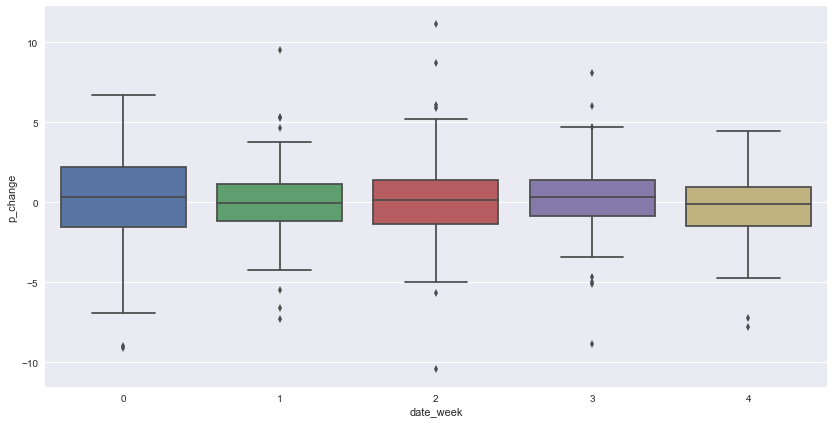

In [39]:
sns.boxplot(x='date_week', y='p_change', data=tsla_df)
plt.show()

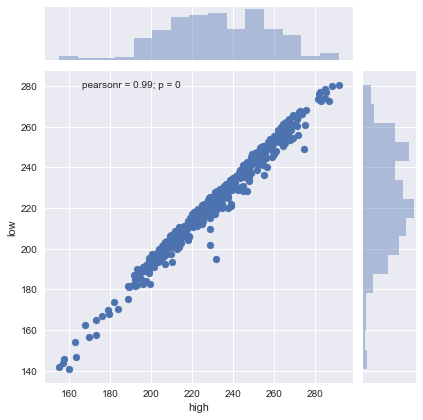

In [41]:
sns.jointplot(tsla_df['high'], tsla_df['low'])
plt.show()

In [44]:
change_df = pd.DataFrame({'tsla':tsla_df.p_change})
change_df = change_df.join(pd.DataFrame({'goog':ABuSymbolPd.make_kl_df('usGooG', n_folds=2).p_change}), how='outer')
change_df = change_df.join(pd.DataFrame({'aapl':ABuSymbolPd.make_kl_df('usAAPL', n_folds=2).p_change}), how='outer')
change_df = change_df.join(pd.DataFrame({'fb':ABuSymbolPd.make_kl_df('usFB', n_folds=2).p_change}), how='outer')
change_df.head()

,tsla,goog,aapl,fb
2014-07-23,1.33,0.21,NaN,2.92
2014-07-24,0.47,-0.44,-0.16,5.18
2014-07-25,0.01,-0.73,0.66,0.28
2014-07-28,0.56,0.27,1.38,-0.36
2014-07-29,0.08,-0.84,-0.65,-1.62


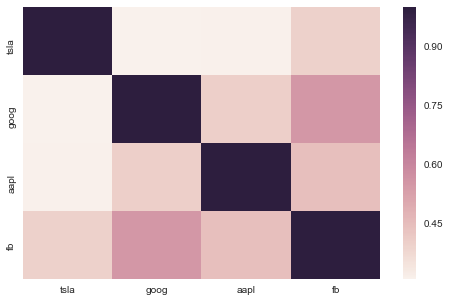

In [45]:
corr = change_df.corr()
_, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr, ax = ax)
plt.show()

# 5.5 实例:可视化量化策略的交易区间以及卖出原因

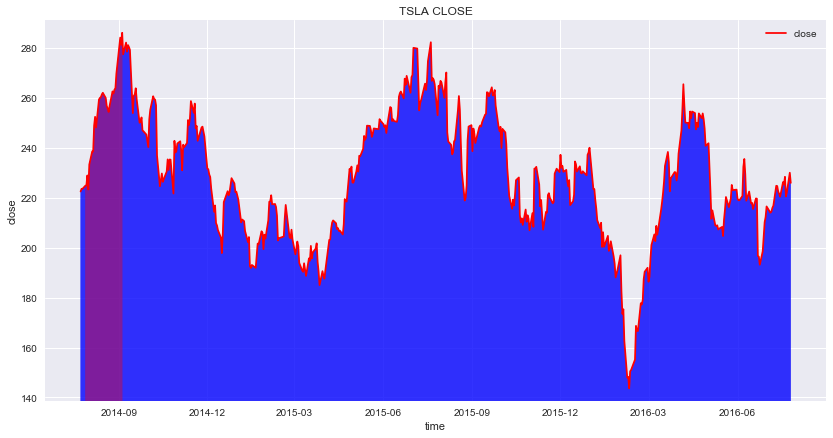

In [65]:
import numpy as np
def plot_trade(buy_date, sell_date):
    start = tsla_df[tsla_df.index == buy_date].key.values[0]
    end = tsla_df[tsla_df.index == sell_date].key.values[0]
    plot_demo(just_series=True)
    plt.fill_between(tsla_df.index, 0, tsla_df['close'], color='blue', alpha = 0.8)
    plt.fill_between(tsla_df.index[start:end], 0, tsla_df['close'][start:end], color='red', alpha=.38)
    plt.ylim(np.min(tsla_df['close']) -5, np.max(tsla_df['close'])+5)
    plt.legend(['close'], loc='best')
#     plt.show()
plot_trade('2014-07-28', '2014-09-05')
plt.show()

表明卖出的原因

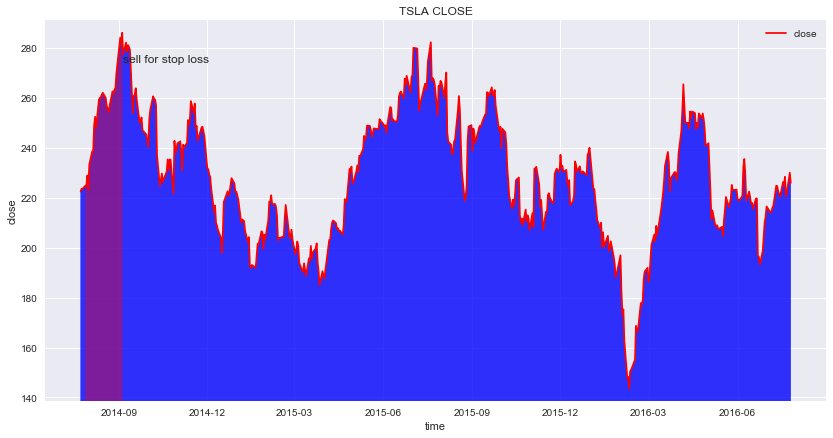

In [66]:
def plot_trade_with_annotate(buy_date, sell_date, annotate):
    plot_trade(buy_date, sell_date)
    plt.annotate(annotate, 
                 xy=(sell_date, tsla_df['close'].asof(sell_date)), 
                 arrowprops = dict(facecolor='yellow'),
                horizontalalignment='left', verticalalignment='top')
plot_trade_with_annotate('2014-07-28', '2014-09-05', 'sell for stop loss')
plt.show()

# 5.6 实例 2:标准化两个股票的观察周期

In [67]:
goog_df = ABuSymbolPd.make_kl_df('usGOOG', n_folds=2)
print(round(goog_df.close.mean(), 2), round(goog_df.close.median(), 2))

624.28 599.25


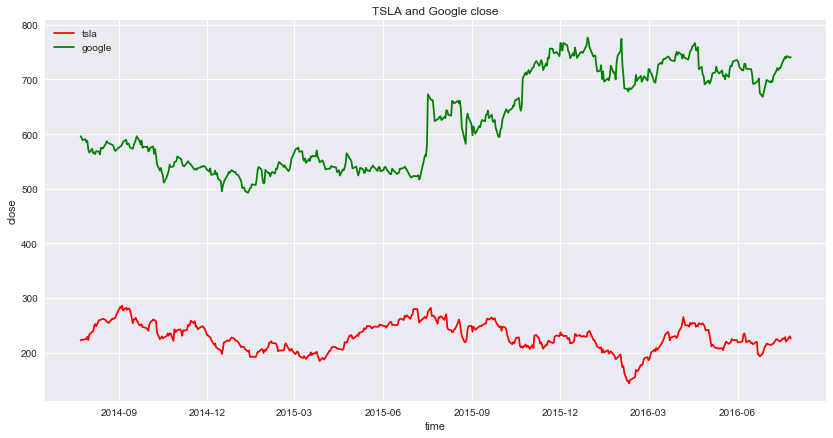

In [73]:
def plot_two_stock(tsla, goog, axs=None):
    drawer = plt if axs is None else axs
    drawer.plot(tsla, c='r')
    drawer.plot(goog, c='g')
    drawer.grid(True)
    drawer.legend(['tsla', 'google'], loc='best')
    plt.title('TSLA and Google close')
    plt.xlabel('time')
    plt.ylabel('close')
plot_two_stock(tsla_df.close, goog_df.close)
plt.show()

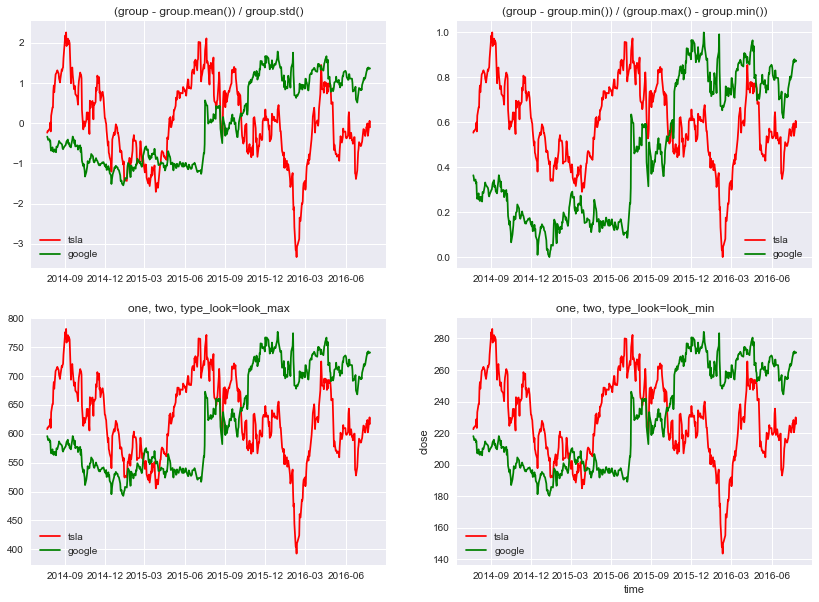

In [75]:
def two_mean_list(one, two, type_look='look_max'):
    one_mean = one.mean()
    two_mean = two.mean()
    if type_look == 'look_max':
        one, two = (one, one_mean/two_mean * two) if one_mean > two_mean else (one * two_mean / one_mean, two)
    elif type_look == 'look_min':
        one, two = (one, two_mean/one_mean * two) if one_mean > two_mean else (one, two * one_mean / two_mean)
    return one,two

def regular_std(group):
    return (group - group.mean()) / group.std()

def regular_mm(group):
    return (group - group.min()) / (group.max() - group.min())

_, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
drawer = axs[0][0]
plot_two_stock(regular_std(tsla_df.close), regular_std(goog_df.close), drawer)
drawer.set_title('(group - group.mean()) / group.std()')

drawer = axs[0][1]
plot_two_stock(regular_mm(tsla_df.close), regular_mm(goog_df.close), drawer)
drawer.set_title('(group - group.min()) / (group.max() - group.min())')

drawer = axs[1][0]
one ,two = two_mean_list(tsla_df.close, goog_df.close, type_look='look_max')
plot_two_stock(one, two, drawer)
drawer.set_title('one, two, type_look=look_max')


drawer = axs[1][1]
one ,two = two_mean_list(tsla_df.close, goog_df.close, type_look='look_min')
plot_two_stock(one, two, drawer)
drawer.set_title('one, two, type_look=look_min')


plt.show()


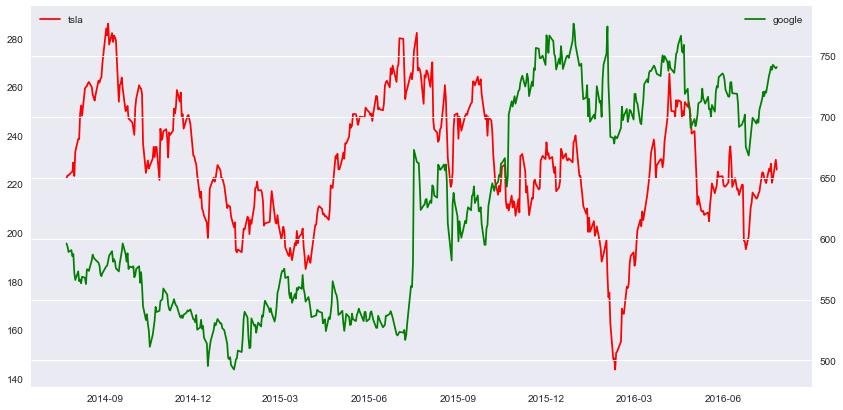

In [78]:
_, ax1 = plt.subplots()
ax1.plot(tsla_df.close, c='r', label='tsla')
ax1.legend(loc=2)
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(goog_df.close, c='g', label='google')
ax2.legend(loc=1)
plt.show()

# 5.7 实例 3: 黄金分割线

## 5.7.1 : 黄金分割线的定义方式

In [80]:
cs_max = tsla_df.close.max()
cs_min = tsla_df.close.min()
sp382 = (cs_max - cs_min) * 0.382 + cs_min
sp618 = (cs_max - cs_min) * 0.618 + cs_min
print('sp382 {}'.format(sp382))
print('sp618 {}'.format(sp618))

sp382 198.05534
sp618 231.65466


In [81]:
from scipy import stats
sp382_stats = stats.scoreatpercentile(tsla_df.close, 38.2)
sp618_stats = stats.scoreatpercentile(tsla_df.close, 61.8)
print(str(round(sp382_stats, 2)))
print(str(round(sp618_stats, 2)))

219.62
237.56


In [1]:
from collections import namedtuple
def plot_golden():
    above618 = np.maximum(sp618, sp618_stats)
    below618 = np.minimum(sp618, sp618_stats)
    above382 = np.maximum(sp382, sp382_stats)
    below382 = np.minimum(sp382, sp382_stats)
    plt.plot(tsla_df.close)
    plt.axhline(sp382, c='r')
    plt.axhline(sp382_stats, c='m')
    plt.axhline(sp618, c='g')
    plt.axhline(sp618_stats, c='k')
    plt.fill_between(tsla_df.index, above618, below618, alpha=0.5, color='r')
    plt.fill_between(tsla_df.index, above382, below382, alpha=0.5, color='g')
    return namedtuple('golden', ['above618', 'below618', 'above382', 'below382'])(above618, below618, above382,below382)

golden = plot_golden()
plt.legend(['close', 'sp382', 'sp382_stats', 'sp618', 'sp618_stats'], loc='best')
plt.show()

NameError: name 'np' is not defined

In [88]:
print('理论上的最高盈利: {}'.format(round(golden.above618 - golden.below382), 3))

理论上的最高盈利: 40.0


## 5.7.2 多维数据绘制实例--跳过

# 5.8 技术指标的可视化

## 5.8.1 MACD指标的可视化

In [90]:
import talib
kl_index = tsla_df.index
dif, dea, bar = talib.MACD(tsla_df.close.values, fastperiod=12, slowperiod=26, signalperiod=9)
plt.plot(kl_index, dif, label='macd dif')
plt.plot(kl_index, dea, label='signal dea')
bar_red = np.where(bar > 0, bar, 0)
plt.bar(kl_index, bar_red, facecolor='red', label='hist bar')
plt.bar(kl_index, bar_green, facecolor='green', label='hist bar')
plt.legend(loc='best')

ModuleNotFoundError: No module named 'talib'

## 5.8.2 ATR指标的可视化--跳过